In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
%matplotlib inline
from IPython.display import display
plt.rc('font', family='Verdana')

## Работа с текстовыми данными

### Строковые типы данных
#### Пример применения: анализ тональности киноотзывов

In [2]:
!tree -L 2 C:/Data/aclImdb

‘«ЁиЄ®¬ ¬­®Ј® Ї а ¬Ґва®ў: 2


In [3]:
from sklearn.datasets import load_files
reviews_train = load_files("C:/Data/aclImdb/train/")
# load_files возвращает коллекцию, содержащую обучающие тексты и обучающие метки
text_train, y_train = reviews_train.data, reviews_train.target
print("тип text_train: {}".format(type(text_train)))
print("длина text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

тип text_train: <class 'list'>
длина text_train: 75000
text_train[1]:
b"Amount of disappointment I am getting these days seeing movies like Partner, Jhoom Barabar and now, Heyy Babyy is gonna end my habit of seeing first day shows.<br /><br />The movie is an utter disappointment because it had the potential to become a laugh riot only if the d\xc3\xa9butant director, Sajid Khan hadn't tried too many things. Only saving grace in the movie were the last thirty minutes, which were seriously funny elsewhere the movie fails miserably. First half was desperately been tried to look funny but wasn't. Next 45 minutes were emotional and looked totally artificial and illogical.<br /><br />OK, when you are out for a movie like this you don't expect much logic but all the flaws tend to appear when you don't enjoy the movie and thats the case with Heyy Babyy. Acting is good but thats not enough to keep one interested.<br /><br />For the positives, you can take hot actresses, last 30 minutes, some co

In [5]:
text_train = [doc.replace(b"<br />", b" ") for doc in text_train]

In [6]:
print("Количество примеров на класс (обучение): {}".format(np.bincount(y_train)))

Количество примеров на класс (обучение): [12500 12500 50000]


In [7]:
reviews_test = load_files("C:/Data/aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target
print("Количество документов в текстовых данных: {}".format(len(text_test)))
print("Количество примеров на класс (тест): {}".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br />", b" ") for doc in text_test]

Количество документов в текстовых данных: 25000
Количество примеров на класс (тест): [12500 12500]


### Представление текстовых данных в виде «мешка слов»

![bag_of_words](images/bag_of_words.png)

#### Применение модели «мешка слов» к синтетическому набору данных

In [11]:
bards_words =["The fool doth think he is wise,",
              "but the wise man knows himself to be a fool"]

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
print("Размер словаря: {}".format(len(vect.vocabulary_)))
print("Содержимое словаря:\n {}".format(vect.vocabulary_))

Размер словаря: 13
Содержимое словаря:
 {'be': 0, 'himself': 5, 'the': 9, 'fool': 3, 'knows': 7, 'think': 10, 'is': 6, 'man': 8, 'to': 11, 'doth': 2, 'but': 1, 'wise': 12, 'he': 4}


In [14]:
bag_of_words = vect.transform(bards_words)
print("bag_of_words: {}".format(repr(bag_of_words)))

bag_of_words: <2x13 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>


In [15]:
print("Плотное представление bag_of_words:\n{}".format(
    bag_of_words.toarray()))

Плотное представление bag_of_words:
[[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


### Модель «мешка слов» для киноотзывов

In [16]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<75000x124255 sparse matrix of type '<class 'numpy.int64'>'
	with 10315542 stored elements in Compressed Sparse Row format>


In [17]:
feature_names = vect.get_feature_names()
print("Количество признаков: {}".format(len(feature_names)))
print("Первые 20 признаков:\n{}".format(feature_names[:20]))
print("Признаки с 20010 по 20030:\n{}".format(feature_names[20010:20030]))
print("Каждый 2000-й признак:\n{}".format(feature_names[::2000]))

Количество признаков: 124255
Первые 20 признаков:
['00', '000', '0000', '0000000000000000000000000000000001', '0000000000001', '000000001', '000000003', '00000001', '000001745', '00001', '0001', '00015', '0002', '0007', '00083', '000ft', '000s', '000th', '001', '002']
Признаки с 20010 по 20030:
['cheapen', 'cheapened', 'cheapening', 'cheapens', 'cheaper', 'cheapest', 'cheapie', 'cheapies', 'cheapjack', 'cheaply', 'cheapness', 'cheapo', 'cheapozoid', 'cheapquels', 'cheapskate', 'cheapskates', 'cheapy', 'chearator', 'cheat', 'cheata']
Каждый 2000-й признак:
['00', '_require_', 'aideed', 'announcement', 'asteroid', 'banquière', 'besieged', 'bollwood', 'btvs', 'carboni', 'chcialbym', 'clotheth', 'consecration', 'cringeful', 'deadness', 'devagan', 'doberman', 'duvall', 'endocrine', 'existent', 'fetiches', 'formatted', 'garard', 'godlie', 'gumshoe', 'heathen', 'honoré', 'immatured', 'interested', 'jewelry', 'kerchner', 'köln', 'leydon', 'lulu', 'mardjono', 'meistersinger', 'misspells', 'mumb

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)
print("Средняя правильность перекр проверки: {:.2f}".format(np.mean(scores)))

Средняя правильность перекр проверки: 0.71


In [19]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Наилучшее значение перекрестной проверки: {:.2f}".format(grid.best_score_))
print("Наилучшие параметры: ", grid.best_params_)

Наилучшее значение перекрестной проверки: 0.72
Наилучшие параметры:  {'C': 0.1}


In [20]:
X_test = vect.transform(text_test)
print("Правильность на тестовом наборе: {:.2f}".format(grid.score(X_test, y_test)))

Правильность на тестовом наборе: 0.13


In [21]:
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train с min_df: {}".format(repr(X_train)))

X_train с min_df: <75000x44532 sparse matrix of type '<class 'numpy.int64'>'
	with 10191240 stored elements in Compressed Sparse Row format>


In [22]:
feature_names = vect.get_feature_names()

print("Первые 50 признаков:\n{}".format(feature_names[:50]))
print("Признаки с 20010 по 20030:\n{}".format(feature_names[20010:20030]))
print("Каждый 700-й признак:\n{}".format(feature_names[::700]))

Первые 50 признаков:
['00', '000', '001', '007', '00am', '00pm', '00s', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '100', '1000', '1001', '100k', '100th', '100x', '101', '101st', '102', '103', '104', '105', '106', '107', '108', '109', '10am', '10pm', '10s', '10th', '10x', '11', '110', '1100', '110th', '111', '112', '1138', '115', '116', '117', '11pm', '11th']
Признаки с 20010 по 20030:
['inert', 'inertia', 'inescapable', 'inescapably', 'inevitability', 'inevitable', 'inevitably', 'inexcusable', 'inexcusably', 'inexhaustible', 'inexistent', 'inexorable', 'inexorably', 'inexpensive', 'inexperience', 'inexperienced', 'inexplicable', 'inexplicably', 'inexpressive', 'inextricably']
Каждый 700-й признак:
['00', 'accountability', 'alienate', 'appetite', 'austen', 'battleground', 'bitten', 'bowel', 'burton', 'cat', 'choreographing', 'collide', 'constipation', 'creatively', 'dashes', 'descended', 'dishing', 'dramatist', 'ejaculation', 'epitomize', 'extinguished', 'figment', 'fo

In [23]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Наилучшее значение перекр проверки: {:.2f}".format(grid.best_score_))

Наилучшее значение перекр проверки: 0.72


### Стоп-слова

In [24]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Количество стоп-слов: {}".format(len(ENGLISH_STOP_WORDS)))
print("Каждое 10-е стоп-слово:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Количество стоп-слов: 318
Каждое 10-е стоп-слово:
['whereupon', 'upon', 'nobody', 'then', 'ltd', 'system', 'one', 'its', 'anyone', 'will', 'hers', 'latterly', 'because', 'elsewhere', 'is', 'other', 'still', 'two', 'with', 'all', 'whole', 'empty', 'few', 'over', 'been', 'myself', 'yours', 'before', 'six', 'while', 'forty', 'us']


In [25]:
# настройка stop_words="english" задает встроенный список стоп-слов.
# мы можем также расширить его и передать свой собственный.
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train с использованием стоп-слов:\n{}".format(repr(X_train)))

X_train с использованием стоп-слов:
<75000x44223 sparse matrix of type '<class 'numpy.int64'>'
	with 6577418 stored elements in Compressed Sparse Row format>


In [26]:
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Наилучшее значение перекр проверки: {:.2f}".format(grid.best_score_))

Наилучшее значение перекр проверки: 0.72


### Масштабирование данных с помощью tf-idf
\begin{equation*}
\text{tfidf}(w, d) = \text{tf} \log\big(\frac{N + 1}{N_w + 1}\big) + 1
\end{equation*}

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression())
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Наилучшее значение перекр проверки: {:.2f}".format(grid.best_score_))

Наилучшее значение перекр проверки: 0.72


In [28]:
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
# преобразуем обучающий набор данных
X_train = vectorizer.transform(text_train)
# находим максимальное значение каждого признака по набору данных
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()
# получаем имена признаков
feature_names = np.array(vectorizer.get_feature_names())

print("Признаки с наименьшими значениями tfidf:\n{}".format(
    feature_names[sorted_by_tfidf[:20]]))

print("Признаки с наибольшими значениями tfidf: \n{}".format(
    feature_names[sorted_by_tfidf[-20:]]))

Признаки с наименьшими значениями tfidf:
['remained' 'acclaimed' 'combines' 'rapidly' 'uniformly' 'diverse'
 'avoiding' 'fills' 'feeble' 'admired' 'wherever' 'admission' 'abound'
 'starters' 'assure' 'pivotal' 'comprehend' 'deliciously' 'strung'
 'inadvertently']
Признаки с наибольшими значениями tfidf: 
['nukie' 'reno' 'dominick' 'taz' 'ling' 'rob' 'victoria' 'turtles' 'khouri'
 'lorenzo' 'id' 'zizek' 'elwood' 'nikita' 'rishi' 'timon' 'titanic' 'zohan'
 'pammy' 'godzilla']


In [29]:
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Признаки с наименьшими значениями idf:\n{}".format(
    feature_names[sorted_by_idf[:100]]))

Признаки с наименьшими значениями idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'one' 'be' 'have' 'are' 'film' 'you' 'all'
 'at' 'an' 'by' 'from' 'so' 'like' 'who' 'there' 'they' 'his' 'if' 'out'
 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'can' 'good' 'when' 'more'
 'up' 'time' 'very' 'even' 'only' 'no' 'see' 'would' 'my' 'story' 'really'
 'which' 'well' 'had' 'me' 'than' 'their' 'much' 'were' 'get' 'other' 'do'
 'been' 'most' 'also' 'into' 'don' 'her' 'first' 'great' 'how' 'made'
 'people' 'will' 'make' 'because' 'way' 'could' 'bad' 'we' 'after' 'them'
 'too' 'any' 'then' 'movies' 'watch' 'she' 'think' 'seen' 'acting' 'its'
 'characters']


#### Исследование коэффициентов модели

IndexError: index 88489 is out of bounds for axis 1 with size 44532

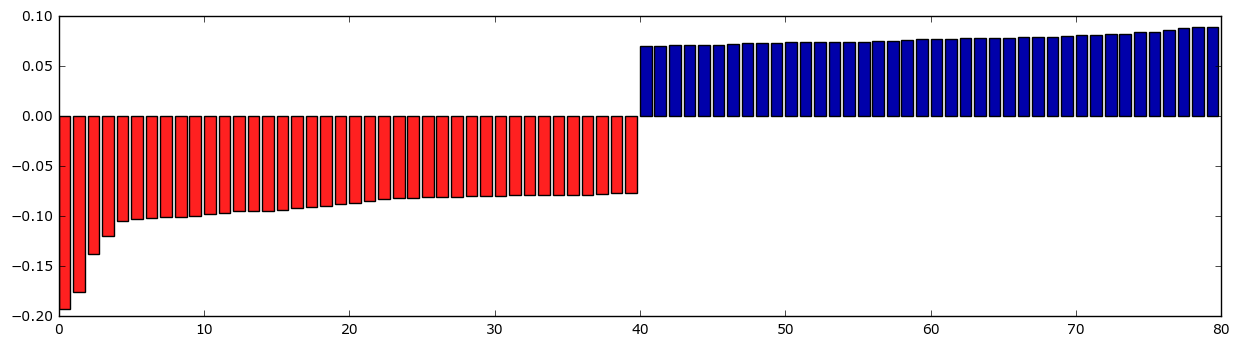

In [30]:
mglearn.tools.visualize_coefficients(
    grid.best_estimator_.named_steps["logisticregression"].coef_,
    feature_names, n_top_features=40)

#### Модель «мешка слов» для последовательностей из нескольких слов (n-грамм)

In [31]:
print("bards_words:\n{}".format(bards_words))

bards_words:
['The fool doth think he is wise,', 'but the wise man knows himself to be a fool']


In [32]:
cv = CountVectorizer(ngram_range=(1, 1)).fit(bards_words)
print("Размер словаря: {}".format(len(cv.vocabulary_)))
print("Словарь:\n{}".format(cv.get_feature_names()))

Размер словаря: 13
Словарь:
['be', 'but', 'doth', 'fool', 'he', 'himself', 'is', 'knows', 'man', 'the', 'think', 'to', 'wise']


In [33]:
cv = CountVectorizer(ngram_range=(2, 2)).fit(bards_words)
print("Размер словаря: {}".format(len(cv.vocabulary_)))
print("Словарь:\n{}".format(cv.get_feature_names()))

Размер словаря: 14
Словарь:
['be fool', 'but the', 'doth think', 'fool doth', 'he is', 'himself to', 'is wise', 'knows himself', 'man knows', 'the fool', 'the wise', 'think he', 'to be', 'wise man']


In [34]:
print("Преобразованные данные (плотн):\n{}".format(cv.transform(bards_words).toarray()))

Преобразованные данные (плотн):
[[0 0 1 1 1 0 1 0 0 1 0 1 0 0]
 [1 1 0 0 0 1 0 1 1 0 1 0 1 1]]


In [35]:
cv = CountVectorizer(ngram_range=(1, 3)).fit(bards_words)
print("Размер словаря: {}".format(len(cv.vocabulary_)))
print("Словарь:\n{}".format(cv.get_feature_names()))

Размер словаря: 39
Словарь:
['be', 'be fool', 'but', 'but the', 'but the wise', 'doth', 'doth think', 'doth think he', 'fool', 'fool doth', 'fool doth think', 'he', 'he is', 'he is wise', 'himself', 'himself to', 'himself to be', 'is', 'is wise', 'knows', 'knows himself', 'knows himself to', 'man', 'man knows', 'man knows himself', 'the', 'the fool', 'the fool doth', 'the wise', 'the wise man', 'think', 'think he', 'think he is', 'to', 'to be', 'to be fool', 'wise', 'wise man', 'wise man knows']


In [38]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
# выполнение решетчатого поиска займет много времени из-за
# относительно большой сетки параметров и включения триграмм
param_grid = {"logisticregression__C": [0.001, 0.01, 0.1, 1, 10, 100],
              "tfidfvectorizer__ngram_range": [(1, 1), (1, 2), (1, 3)]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Наилучшее значение перекр проверки: {:.2f}".format(grid.best_score_))
print("Наилучшие параметры:\n{}".format(grid.best_params_))

Наилучшее значение перекр проверки: 0.72
Наилучшие параметры:
{'logisticregression__C': 10, 'tfidfvectorizer__ngram_range': (1, 1)}


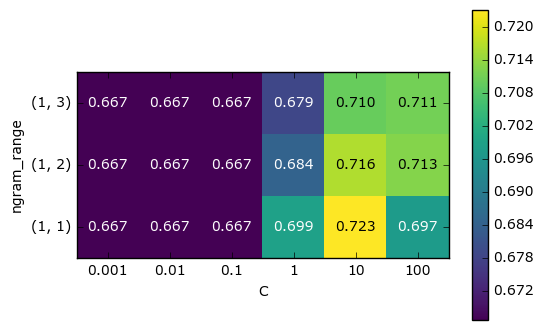

In [39]:
# излекаем значения правильности, найденные в ходе решетчатого поиска
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T
# визуализируем теплокарту
heatmap = mglearn.tools.heatmap(
scores, xlabel="C", ylabel="ngram_range", cmap="viridis", fmt="%.3f",
xticklabels=param_grid['logisticregression__C'],
yticklabels=param_grid['tfidfvectorizer__ngram_range'])
plt.colorbar(heatmap)

IndexError: index 88489 is out of bounds for axis 1 with size 44532

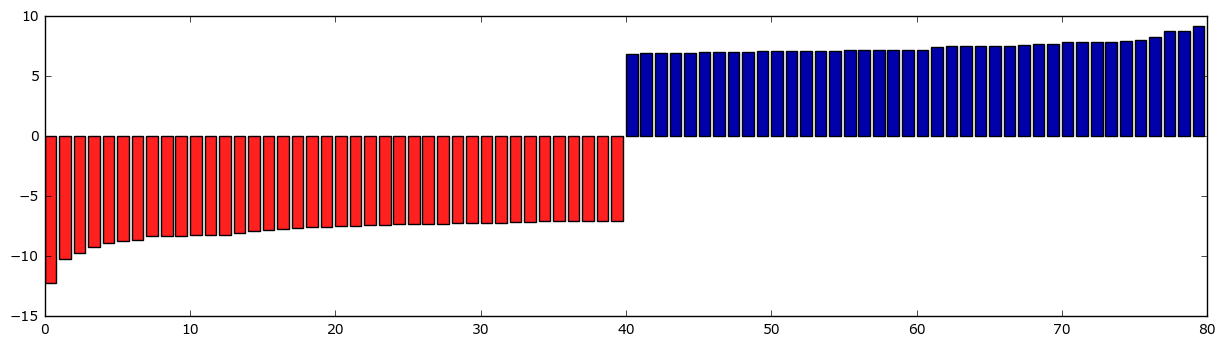

In [40]:
# извлекаем названия признаков и коэффициенты
vect = grid.best_estimator_.named_steps['tfidfvectorizer']
feature_names = np.array(vect.get_feature_names())
coef = grid.best_estimator_.named_steps['logisticregression'].coef_
mglearn.tools.visualize_coefficients(coef, feature_names, n_top_features=40)

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 133596 but corresponding boolean dimension is 44532


ValueError: incompatible sizes: argument 'height' must be length 80 or scalar

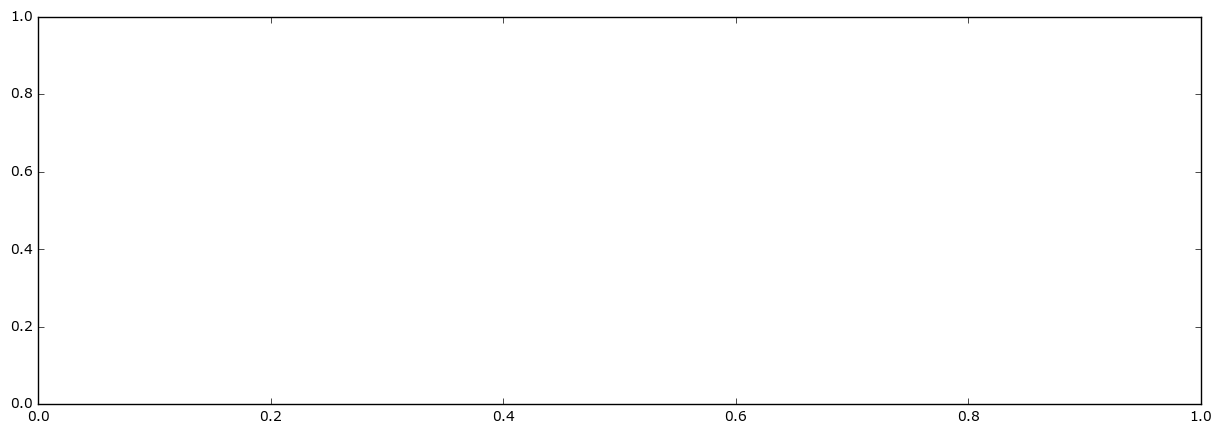

In [41]:
# находим триграммные признаки
mask = np.array([len(feature.split(" ")) for feature in feature_names]) == 3
# визуализируем только 3-граммные признаки
mglearn.tools.visualize_coefficients(coef.ravel()[mask],
                                     feature_names[mask], n_top_features=40)

#### Продвинутая токенизация, стемминг и лемматизация

In [42]:
import spacy
import nltk

# загружаем модели пакета spacy для английского языка
en_nlp = spacy.load('en')
# создаем экземпляр стеммера Портера из пакета nltk
stemmer = nltk.stem.PorterStemmer()

# задаем функцию, сравнивающую лемматизацию в spacy со стеммингом в nltk
def compare_normalization(doc):
    # токенизируем документ в spacy
    doc_spacy = en_nlp(doc)
    # печатаем леммы, найденные с помощью spacy
    print("Лемматизация:")
    print([token.lemma_ for token in doc_spacy])
    # печатаем токены, найденные с помощью стеммера Портера
    print("Стемминг:")
    print([stemmer.stem(token.norm_.lower()) for token in doc_spacy])

In [43]:
compare_normalization(u"Our meeting today was worse than yesterday, "
                       "I'm scared of meeting the clients tomorrow.")

Лемматизация:
['our', 'meeting', 'today', 'be', 'bad', 'than', 'yesterday', ',', 'i', 'be', 'scar', 'of', 'meet', 'the', 'client', 'tomorrow', '.']
Стемминг:
['our', 'meet', 'today', 'wa', 'wors', 'than', 'yesterday', ',', 'i', "'m", 'scare', 'of', 'meet', 'the', 'client', 'tomorrow', '.']


In [10]:
# С технической точки зрения мы хотим применить токенизатор на основе
# регулярных выражений (regexp), который используется в CountVectorizer, а
# пакет spacy  использовать лишь для лемматизации. Для этого мы
# заменим en_nlp.tokenizer (токенизатор пакета spacy)
# токенизатором на основе регулярных выражений.
import re
# regexp, используемые в CountVectorizer
regexp = re.compile('(?u)\\b\\w\\w+\\b')

# загружаем языковую модель spacy и сохраняем старый токенизатор
en_nlp = spacy.load('en')
old_tokenizer = en_nlp.tokenizer
# заменяем токенизатор  старым на основе регулярных выражений
en_nlp.tokenizer = lambda string: old_tokenizer.tokens_from_list(
    regexp.findall(string))

# создаем пользовательский токенизатор с помощью конвейера обработки документов spacy
# (теперь используем наш собственный токенизатор)
def custom_tokenizer(document):
    doc_spacy = en_nlp(document, entity=False, parse=False)
    return [token.lemma_ for token in doc_spacy]

# задаем countvectorizer с пользовательским токенизатором
lemma_vect = CountVectorizer(tokenizer=custom_tokenizer, min_df=5)

NameError: name 'CountVectorizer' is not defined

In [ ]:
# преобразуем text_train, используя CountVectorizer с лемматизацией
X_train_lemma = lemma_vect.fit_transform(text_train)
print("форма X_train_lemma: {}".format(X_train_lemma.shape))

# стандартный CountVectorizer для сравнения
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("форма X_train: {}".format(X_train.shape))

In [ ]:
# строим модель решетчатого поиска, используя 1% данных в качестве обучающего набора
from sklearn.model_selection import StratifiedShuffleSplit

param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.99,
                            train_size=0.01, random_state=0)
grid = GridSearchCV(LogisticRegression(), param_grid, cv=cv)
# выполняем решетчатый поиск, используя данные, к которым был 
# применен стандартный CountVectorizer
grid.fit(X_train, y_train)
print("Наилучшее значение перекрестной проверки "
      "(стандартный CountVectorizer): {:.3f}".format(grid.best_score_))
# выполняем решетчатый поиск, используя данные, к которым была
# применена лемматизация
grid.fit(X_train_lemma, y_train)
print("Наилучшее значение перекрестной проверки "
      "(лемматизация): {:.3f}".format(grid.best_score_))

### Моделирование тем и кластеризация документов
#### Латентное размещение Дирихле

In [ ]:
vect = CountVectorizer(max_features=10000, max_df=.15)
X = vect.fit_transform(text_train)

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_topics=10, learning_method="batch",
                                max_iter=25, random_state=0)
# Мы строим модель и преобразуем данные в один этап
# Преобразование займет некоторое время,
# и мы можем сэкономить время, выполнив обе операции сразу
document_topics = lda.fit_transform(X)

In [ ]:
print("lda.components_.shape: {}".format(lda.components_.shape))

In [ ]:
# Для каждой темы (строки в components_) сортируем признаки (по возрастанию)
# Инвертируем строки с помощью [:, ::-1], чтобы получить сортировку по убыванию
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
# Получаем имена признаков из векторизатора
feature_names = np.array(vect.get_feature_names())

In [ ]:
# Выводим 10 тем:
mglearn.tools.print_topics(topics=range(10), feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=10)

In [ ]:
lda100 = LatentDirichletAllocation(n_topics=100, learning_method="batch",
                                   max_iter=25, random_state=0)
document_topics100 = lda100.fit_transform(X)

In [ ]:
topics = np.array([7, 16, 24, 25, 28, 36, 37, 41, 45, 51, 53, 54, 63, 89, 97])

In [ ]:
sorting = np.argsort(lda100.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())
mglearn.tools.print_topics(topics=topics, feature_names=feature_names,
                           sorting=sorting, topics_per_chunk=5, n_words=20)

In [ ]:
# сортируем документы по весу темы 45 "музыка"
music = np.argsort(document_topics100[:, 45])[::-1]
# печатаем пять документов, в которых данная тема является наиболее важной
for i in music[:10]:
    # выводим первые два предложения
    print(b".".join(text_train[i].split(b".")[:2]) + b".\n")

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 10))
topic_names = ["{:>2} ".format(i) + " ".join(words)
               for i, words in enumerate(feature_names[sorting[:, :2]])]
# две столбиковые диаграммы:
for col in [0, 1]:
    start = col * 50
    end = (col + 1) * 50
    ax[col].barh(np.arange(50), np.sum(document_topics100, axis=0)[start:end])
    ax[col].set_yticks(np.arange(50))
    ax[col].set_yticklabels(topic_names[start:end], ha="left", va="top")
    ax[col].invert_yaxis()
    ax[col].set_xlim(0, 2000)
    yax = ax[col].get_yaxis()
    yax.set_tick_params(pad=130)
plt.tight_layout()

### Выводы и перспективы